In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def union(r1,r2,big) :
  if r2 != r1 :
    if ptr[r1] > ptr[r2] :
      ptr[r2] += ptr[r1]
      ptr[r1] = r2
      r1 = r2
    else :
      ptr[r1] += ptr[r2]
      ptr[r2] = r1
    if -ptr[r1] > big :
      big = -ptr[r1]
  return r1, r2, big

In [3]:
def find(i) :
  if ptr[i] < 0 :
    return i
  else :
    ptr[i] = find(ptr[i])
    return ptr[i]

In [4]:
def create_bonds(L):
    bonds = []
    for i in range(L):
        for j in range(L):
            index = i * L + j
            if j < L - 1:  # 오른쪽 연결
                bonds.append((index, index + 1))
            if i < L - 1:  # 아래 연결
                bonds.append((index, index + L))
    np.random.shuffle(bonds)
    return bonds

In [5]:
def simul(B, L, iterations=1000):
    N = L ** 2
    rd = np.random.choice([-1, 1], size=N, p=[0.5, 0.5])
    P = 1 - np.exp(-2 * B)
    S = []

    bonds = create_bonds(L)

    for _ in range(iterations):
        global ptr  # Ensure ptr is updated globally in each iteration
        ptr = np.full(N, -1)
        big = 0

        for bond in bonds:
            s1, s2 = bond
            r1 = find(s1)
            r2 = find(s2)
            if rd[r1] == rd[r2]:
                if np.random.rand() < P:
                    r1, r2, big = union(r1, r2, big)

        clusters = [i for i, v in enumerate(ptr) if v < 0]
        for cluster in clusters:
            members = [i for i, v in enumerate(ptr) if find(i) == cluster]
            if np.random.rand() < 0.5:
                for member in members:
                    rd[member] *= -1

        S.append(abs(np.mean(rd)))

    return np.mean(S)

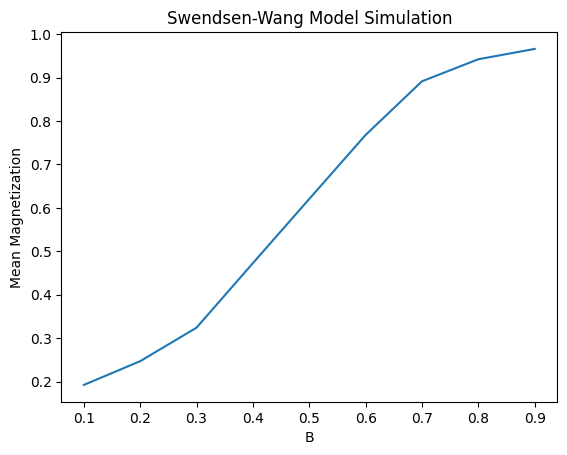

In [6]:
B_list = np.arange(0.1, 1.0, 0.1)
result = [simul(B, 5) for B in B_list]

plt.plot(B_list, result)
plt.xlabel('B')
plt.ylabel('Mean Magnetization')
plt.title('Swendsen-Wang Model Simulation')
plt.show()